In [3]:
pip install yfinance pandas scikit-learn matplotlib

  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.12.0-cp39-abi3-win_amd64.whl.metadata (15 kB)
  Using cached websockets-15.0.1-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
Using cached yfinance-0.2.65-py2.py3-none-any.whl (119 kB)
Using cached curl_cffi-0.12.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached websockets-15.0.1-cp312-cp312-win_amd64.whl (176 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Download last 3 years of Apple stock data
df = yf.download('AAPL', period='3y')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

C:\Users\YC\AppData\Local\Temp\ipykernel_17276\1779951083.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period='3y')
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-08-02,157.572019,159.845542,157.109439,157.483429,59907000
2022-08-03,158.300312,163.959518,158.211736,163.506790,82507500
2022-08-04,163.388703,164.550079,161.833649,163.191864,55474100
2022-08-05,160.856075,163.457999,160.649097,162.965210,56697000
2022-08-08,163.970462,165.389695,161.831761,162.492096,60276900


In [6]:
# Shift Close column to get next day's close as target
df['Target'] = df['Close'].shift(-1)

# Drop last row (no target for it)
df = df.dropna()

# Features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

In [7]:
# Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # No shuffle for time series!

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

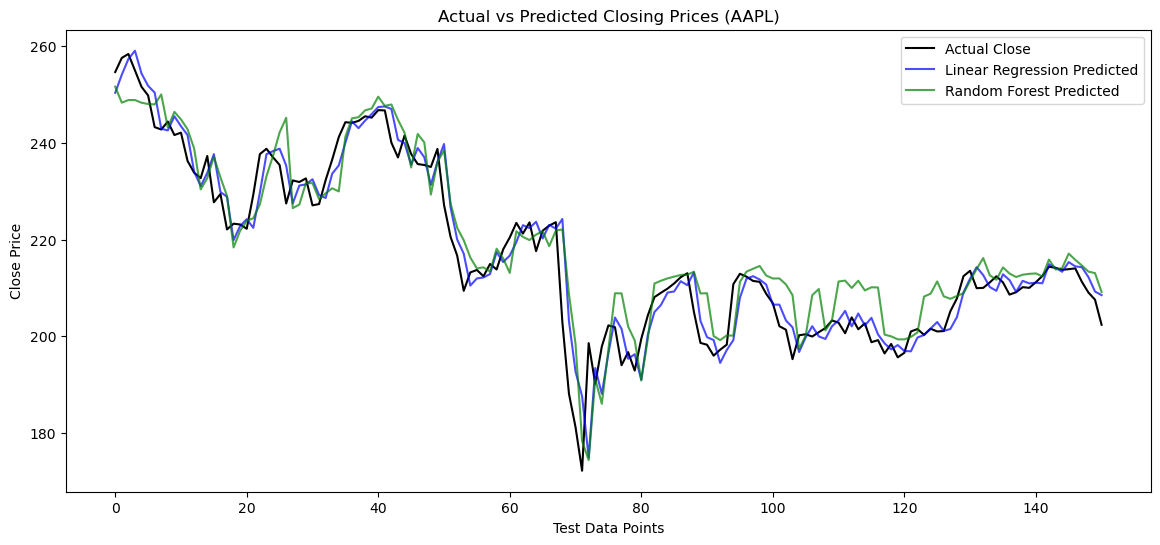

In [10]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='black')
plt.plot(y_pred_lr, label='Linear Regression Predicted', color='blue', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest Predicted', color='green', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices (AAPL)')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [11]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression RMSE: 4.947641811689016
Random Forest RMSE: 6.630720744695174
